# Práctica 2 - PROSPER LOAN

- Manuel del Pino Guerrero
- Santiago García Gisbert


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read data

In [2]:
df = pd.read_csv('./data/prosperLoanData_train.csv') #Estos csv salen de la Práctica 1

df_oot = pd.read_csv('./data/prosperLoanData_oot.csv')

C:\Users\Knowhow\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.groupby('bad').size()

bad
False    15165
True      1822
dtype: int64

In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

## Differenciate between usable features and other columns

En esta sección tendremos que eliminar aquellas columnas que no vayamos a usar. Para ello tendremos que detallar todas aquellas columnas que vayamos a eliminar con las explicaciones pertinentes. En consecuencia, todas aquellas variables que no vayamos a utilizar no estarán incluidas como **FEATURES**

Variables a excluir:
- **LoanStatus**: Al no tener en cuenta la maturity no se tendrá en consideración 
- **ClosedDate**: Porque tiene información pasada de la *Origination Date*
- **BorrowerAPR**: Es el ratio de porcentaje que no nos aporta información sobre la maturity. Después de la fecha de originación
- **ListingKey**: Es un ID
- **ListingNumber**: Es un ID
- **ListingCreationDate**: Es una fecha
- **Term**: Es la longuitud del préstamo
- **CreditGrade**: Solo tiene información hasta 2009.
- **BorrowerRate**: Después de la fecha de originación
- **LenderYield**: Son los datos del lender (prestamista)
- **EstimatedEffectiveYield**: Contiene datos de otras variables. Multicolinealidad.
- **EstimatedLoss**: Información a partir de Julio 2009
- **EstimatedReturn**: Información a partir de Julio 2009
- **BorrowerState**: Información localidad
- **CurrentlyInGroup**: Te establece un grupo específico.
- **GroupKey**: ID
- **DateCreditPulled**:Fecha 
- **PublicRecordsLast10Years**: Contiene información fuera del rango
- **PublicRecordsLast12Months**: Contiene información fuera del rango
- **RevolvingCreditBalance**: Contiene información fuera del rango
- **BankcardUtilization**: Porcentaje fuera del rango
- **AvailableBankcardCredit**:Porcentaje fuera del rango
- **TradesOpenedLast6Months**: Información solo de los últimos 6 meses de la variable
- **DebtToIncomeRatio**: Fecha cuando fue originado el préstamo
- **IncomeVerifiable**: String
- **LoanKey**: ID
- **TotalProsperLoans**: Modelo de Prosper
- **TotalProsperPaymentsBilled**: Modelo de Prosper
- **OnTimeProsperPayments**: Modelo de Prosper
- **ProsperPaymentsLessThanOneMonthLate**: Modelo de Prosper
- **ProsperPaymentsOneMonthPlusLate**: Modelo de Prosper
- **ProsperPrincipalBorrowed**: Modelo de Prosper
- **ProsperPrincipalOutstanding**: Modelo de Prosper
- **LoanCurrentDaysDelinquent**: Después de la fecha de originación
- **LoanFirstDefaultedCycleNumber**: Variable objetivo 
- **LoanMonthsSinceOrigination**: Después de la fecha de originación
- **LoanNumber**: ID
- **LP_CustomerPrincipalPayments**:El préstamo está charge-off
- **LoanOriginationDate**: Fecha
- **LoanOriginationQuarter**: Fecha
- **LP_CustomerPrincipalPayments**: Información despúes fecha originación
- **LP_CustomerPayments**: Información despúes fecha originación
- **MonthlyLoanPayment**: Fecha
- **MemberKey**: ID
- **LP_InterestandFees**Intereses
- **LP_ServiceFees**: Comisiones
- **LP_CollectionFees**: Comisiones
- **LP_GrossPrincipalLoss**:  Información despúes fecha originación
- **LP_NetPrincipalLoss**: Información despúes fecha originación
- **LP_NonPrincipalRecoverypayments**:Información despúes fecha originación
- **Recommendations**: String
- **InvestmentFromFriendsCount**:Información despúes fecha originación
- **Investors**_ ID
- **InvestmentFromFriendsAmount**: Información despúes fecha originación
- **bad_aux**: Variable creada
- **PW**:La Performance Window la quitamos de nuestro modelo. Variable creada
- **bad_rate**: El porcentaje de préstamos malos decidimos quitarla porque forma parte del Target.Variable creada
- **bad**: Es la columna objetivo por lo que decidimos quitarla de nuestro modelo.Variable creada
- **fraud**: Variable creada
- **indeterm**: No aporta información para evaluar el estado actual del préstamo.Variable creada
- **LoanOriginationYear**: Fecha
- **LoanMonthsSinceOriginationY**: Fecha

In [5]:
drop = ["LoanStatus","ClosedDate","BorrowerAPR","ListingKey","ListingNumber","ListingCreationDate","Term",
             "CreditGrade","BorrowerRate","LenderYield","EstimatedEffectiveYield","EstimatedLoss",
             "EstimatedReturn","BorrowerState","CurrentlyInGroup",
             "GroupKey","DateCreditPulled","PublicRecordsLast10Years",
             "PublicRecordsLast12Months","RevolvingCreditBalance","BankcardUtilization","AvailableBankcardCredit",
             "TradesOpenedLast6Months","DebtToIncomeRatio","IncomeVerifiable","LoanKey",'TotalProsperLoans',
             'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate',
             'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
             'LoanNumber',"LP_CustomerPrincipalPayments",'LoanOriginationDate','LoanOriginationQuarter',
             'LP_CustomerPrincipalPayments','LP_CustomerPayments','MonthlyLoanPayment','MemberKey',
             "LP_InterestandFees","LP_ServiceFees","LP_CollectionFees","LP_GrossPrincipalLoss",
             "LP_NetPrincipalLoss","LP_NonPrincipalRecoverypayments","Recommendations", "InvestmentFromFriendsCount","Investors",
             "InvestmentFromFriendsAmount", "bad_aux", "PW", "bad_rate", "bad", 'fraud', 'indeterm', 'LoanOriginationYear', 'LoanMonthsSinceOriginationY',
            'ProsperRating (numeric)', 
            'ProsperRating (Alpha)', 'ProsperScore']

In [6]:
features = [c for c in df.columns if c not in drop]
col_target = 'bad'

## Data exploration

In [7]:
df[features].dtypes

ListingCategory (numeric)               int64
Occupation                             object
EmploymentStatus                       object
EmploymentStatusDuration              float64
IsBorrowerHomeowner                      bool
CreditScoreRangeLower                 float64
CreditScoreRangeUpper                 float64
FirstRecordedCreditLine                object
CurrentCreditLines                    float64
OpenCreditLines                       float64
TotalCreditLinespast7years            float64
OpenRevolvingAccounts                   int64
OpenRevolvingMonthlyPayment           float64
InquiriesLast6Months                  float64
TotalInquiries                        float64
CurrentDelinquencies                  float64
AmountDelinquent                      float64
DelinquenciesLast7Years               float64
TotalTrades                           float64
TradesNeverDelinquent (percentage)    float64
IncomeRange                            object
StatedMonthlyIncome               

In [8]:
cat_features = [f for f, b in zip(features, df[features].dtypes == object) if b==True]
num_features = [f for f in features if f not in cat_features]

In [9]:
df[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ListingCategory (numeric),16987.0,3.840290,4.103710,0.0,1.00,2.000000,7.000000,20.000000
EmploymentStatusDuration,16982.0,90.379225,89.131565,0.0,27.00,61.000000,126.000000,755.000000
CreditScoreRangeLower,16987.0,701.827280,53.510729,600.0,660.00,700.000000,740.000000,880.000000
CreditScoreRangeUpper,16987.0,720.827280,53.510729,619.0,679.00,719.000000,759.000000,899.000000
CurrentCreditLines,16987.0,9.443398,5.285003,0.0,6.00,9.000000,12.000000,40.000000
OpenCreditLines,16987.0,8.326485,4.740277,0.0,5.00,8.000000,11.000000,34.000000
TotalCreditLinespast7years,16987.0,26.197857,13.843854,2.0,16.00,24.000000,34.000000,120.000000
OpenRevolvingAccounts,16987.0,6.372402,4.224160,0.0,3.00,5.000000,8.000000,33.000000
OpenRevolvingMonthlyPayment,16987.0,355.054630,411.553102,0.0,92.00,225.000000,465.000000,5184.000000
InquiriesLast6Months,16987.0,1.121740,1.611185,0.0,0.00,1.000000,2.000000,27.000000


In [10]:
df[cat_features].describe().transpose()

,count,unique,top,freq
Occupation,16987,67,Other,4460
EmploymentStatus,16987,7,Employed,10647
FirstRecordedCreditLine,16987,6428,1993-12-01 00:00:00,40
IncomeRange,16987,7,"$25,000-49,999",5420


### Custom Pandas describing

## TO DO

En este TO DO tendremos que crearnos una *def* que devuelva un análisis descriptivo sobre cada una de las variables numéricas, siguiendo las instrucciones contenidas en la siguiente sección

In [11]:
#TO DO: IMPLEMENT CATEGORICAL DESCRIPTIVE FUNCTION  (Llamar a una API DE Pandas)

#custom function to describe a numerical variable
def desc_num(df, df_oot, col):
    """Function that returns a custom descriptive for the numerical variable. It returns:
        - Mean, median, minimum, maximum, p25, p75, std, %na %nonzero, %unique
        - Histogram plot
        - Stability plot
    
    Args:
        df: Pandas DataFrame with the in time input data
        df_oot: Pandas DataFrame with the out of time input data
        col: Name of the column with the feature under study
        
    Returns:
        Dictionary that contains the main statistics of the feature
    """
    #dictionary to keep main statistics
    dict_stats = {'Mean': df[col].mean(), 
                  'Median':df[col].median(),
                  'Min': df[col].min(),
                  'Max': df[col].max(), 
                  'p25': df[col].quantile(0.25),
                  'p75': df[col].quantile(0.75), 
                  'Std': df[col].std(),
                  'NA %': (df[col].isna().sum() / len(df[col])) * 100,
                  'Non Zero %': df[col].fillna(0).astype(bool).sum() / len(df[col])
                  #'Unique %': df[col].mean() 
                 }
 
    sns.distplot(df[col], hist=False, rug=True, label='DF')
    sns.distplot(df_oot[col], hist=False, rug=True, label='DF OOT')
    plt.legend()
    plt.show()
 
    return dict_stats
        

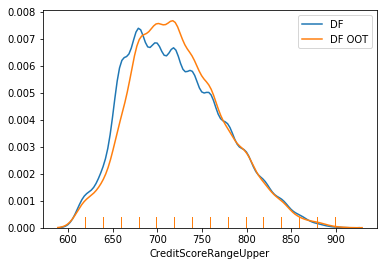

{'Mean': 720.3006354249404,
 'Median': 719.0,
 'Min': 619.0,
 'Max': 899.0,
 'p25': 679.0,
 'p75': 759.0,
 'Std': 54.16480409797813,
 'NA %': 0.0,
 'Non Zero %': 1.0}

In [14]:
desc_num(df, df_oot, 'CreditScoreRangeUpper')

In [12]:
df.CurrentCreditLines.fillna(0).astype(bool).sum()

16902

In [13]:
df.CurrentCreditLines.shape

(16987,)

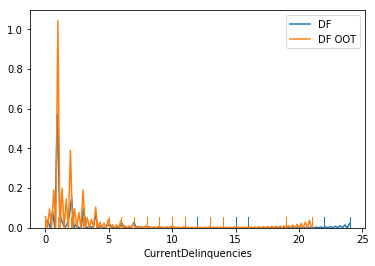

{'Mean': 0.39356632247815726,
 'Median': 0.0,
 'Min': 0.0,
 'Max': 24.0,
 'p25': 0.0,
 'p75': 0.0,
 'Std': 1.2298985695094606,
 'NA %': 0.0,
 'Non Zero %': 0.18377680698967436}

In [17]:
desc_num(df, df_oot, 'CurrentDelinquencies')

Generamos un análisis estadístico descriptivo para las variables numéricas. A través del comando *for* recorreremos cada una de las columnas que sean numéricas para que nos devuelva el output seleccionado a través de la función previamente creada


########-----------------------########


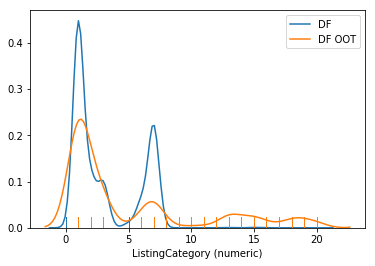

{'Mean': 3.1223193010325656, 'Median': 2.0, 'Min': 0, 'Max': 20, 'p25': 1.0, 'p75': 6.0, 'Std': 2.599796487324916, 'NA %': 0.0, 'Non Zero %': 0.9993050039714059}

########-----------------------########


C:\Users\Knowhow\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Knowhow\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


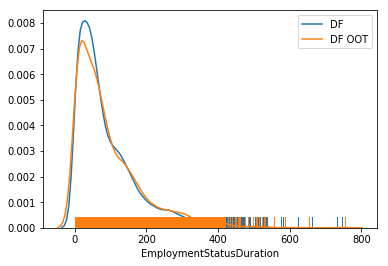

{'Mean': 89.33548579376118, 'Median': 61.0, 'Min': 0.0, 'Max': 745.0, 'p25': 28.0, 'p75': 125.0, 'Std': 87.02946612850415, 'NA %': 0.05957108816521049, 'Non Zero %': 0.9918586179507546}

########-----------------------########


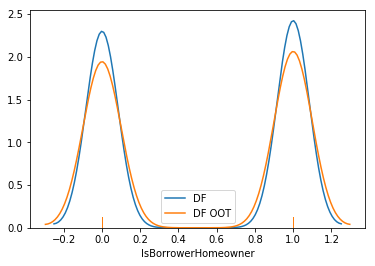

{'Mean': 0.5132049245432884, 'Median': 1.0, 'Min': False, 'Max': True, 'p25': 0.0, 'p75': 1.0, 'Std': 0.4998504140291354, 'NA %': 0.0, 'Non Zero %': 0.5132049245432884}

########-----------------------########


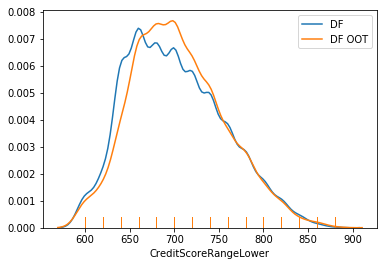

{'Mean': 701.3006354249404, 'Median': 700.0, 'Min': 600.0, 'Max': 880.0, 'p25': 660.0, 'p75': 740.0, 'Std': 54.16480409797813, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########


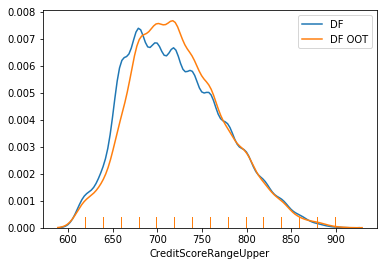

{'Mean': 720.3006354249404, 'Median': 719.0, 'Min': 619.0, 'Max': 899.0, 'p25': 679.0, 'p75': 759.0, 'Std': 54.16480409797813, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########


KeyboardInterrupt: 

In [18]:
#generate the descriptive statistics for numeric variables
for col in num_features:
    print ('\n########-----------------------########')
    dict_stats = desc_num(df, df_oot, col)
    print (dict_stats)

In [14]:
#TODO: IMPLEMENT CATEGORICAL DESCRIPTIVE FUNCTION

def desc_cat(df, df_oot, col):
    """Function that returns a custom descriptive for the categorical variable. It returns:
        - # Unique entires, % Unique entries, top frequent entry, frequency of top, NA rate
        - Histogram plot
        - Stability plot
    
    Args:
        df: Pandas DataFrame with the in time input data
        df_oot: Pandas DataFrame with the out of time input data
        col: Name of the column with the feature under study
        
    Returns:
        Dictionary that contains the main statistics of the feature
    """
    #dictionary to keep main statistics
    dict_stats= {'Unique Entrys': df[col].value_counts(),
                 #'% Unique Entries': (df[col].unique()/ len(df[col])) *100,
                 #'Top frequent entry': df[col],
                 #'Frecuency of top': df[col],
                 'NA rate %': (df[col].isna().sum() / len(df[col])) * 100,
                 'Non Zero %': df[col].fillna(0).astype(bool).sum() / len(df[col])
                }
    
    return dict_stats

In [20]:
desc_cat(df, df_oot, 'Occupation')

{'Unique Entrys': Other                                 2572
 Professional                          1316
 Computer Programmer                    506
 Administrative Assistant               392
 Executive                              379
 Analyst                                374
 Teacher                                334
 Accountant/CPA                         330
 Sales - Commission                     260
 Sales - Retail                         256
 Clerical                               245
 Skilled Labor                          217
 Retail Management                      211
 Nurse (RN)                             197
 Military Enlisted                      150
 Engineer - Electrical                  136
 Truck Driver                           136
 Engineer - Mechanical                  135
 Police Officer/Correction Officer      128
 Laborer                                121
 Food Service Management                113
 Civil Service                          113
 Attorney      

In [15]:
#generate the descriptive statistics for all variables
for col in cat_features:
    print ('\n########-----------------------########')
    print ('Output for: {}'.format(col))
    dict_stats = desc_cat(df, df_oot, col)
    print (dict_stats)


########-----------------------########
Output for: Occupation
{'Unique Entrys': Other                                 4460
Professional                          2140
Computer Programmer                    791
Executive                              654
Administrative Assistant               642
Analyst                                596
Teacher                                581
Accountant/CPA                         530
Sales - Retail                         461
Sales - Commission                     442
Skilled Labor                          416
Clerical                               392
Nurse (RN)                             365
Retail Management                      365
Engineer - Mechanical                  248
Laborer                                231
Truck Driver                           229
Military Enlisted                      227
Police Officer/Correction Officer      224
Engineer - Electrical                  212
Construction                           206
Civil Service  

### Correlation Review

STEPS:

- Set numerics values in order to build our correlation matrix
- Generate a triangle shape matrix
- Fit the graph with the desired shape
- Set colours in our correlation matrix
- Set the heat map to see what features are the most correlated

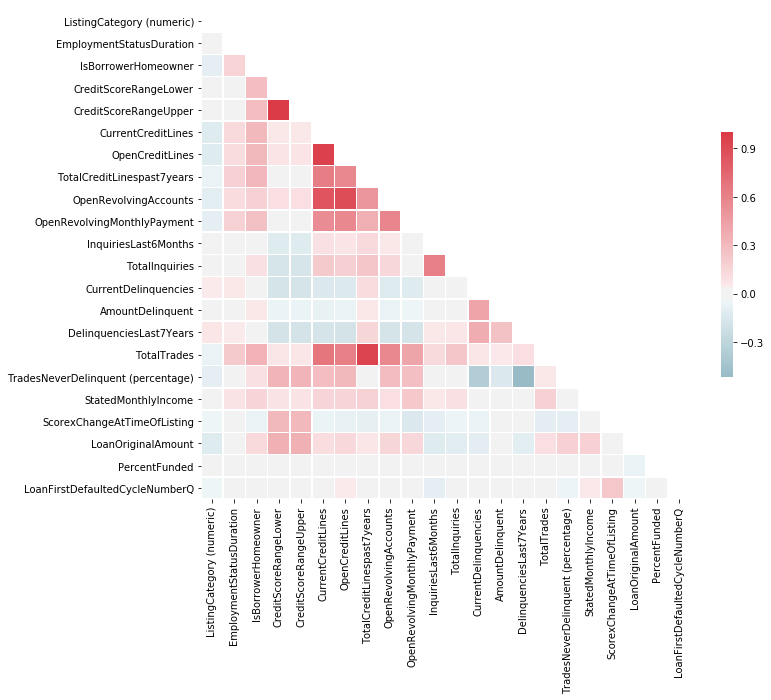

In [16]:
# Compute the correlation matrix
corr = df[num_features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
corr[corr!=1.].max().sort_values().tail(5)

OpenRevolvingAccounts         0.888447
TotalCreditLinespast7years    0.942083
TotalTrades                   0.942083
OpenCreditLines               0.957426
CurrentCreditLines            0.957426
dtype: float64

#### Get pairs of highly correlated features

In [18]:
corr_TH = 0.75 #Fijamos un nivel de correlación y filtramos todas las variables por encima de ese nivel de correlación.
n_corr_list = []
corr_feats_list = []

Now we creat a **for** to:

- Iterate each of the numeric features
- We work on absolute values to delete negative number and avoid inconsistency
- Fit to extract correlations higher than 0.75 beacause this is our selected THRESHOLD

In [19]:
for f in num_features:
    #get correlation entries for the feature
    corr_f = corr[f][[col for col in num_features if col!=f]]
    #work with absolute value
    corr_f_abs = corr_f.abs()
    #get features above corr TH
    corr_ht_th = corr_f_abs[corr_f_abs>corr_TH]
    n_corr_list.append(corr_ht_th.shape[0])
    corr_feats_list.append(corr_ht_th)

corr_relations = [(feat, n, feats_corr) for n, feats_corr, feat in zip(n_corr_list, corr_feats_list, num_features) if n>0]
corr_relations #correlaciones entre variables

[('CreditScoreRangeLower', 1, CreditScoreRangeUpper    1.0
  Name: CreditScoreRangeLower, dtype: float64),
 ('CreditScoreRangeUpper', 1, CreditScoreRangeLower    1.0
  Name: CreditScoreRangeUpper, dtype: float64),
 ('CurrentCreditLines', 2, OpenCreditLines          0.957426
  OpenRevolvingAccounts    0.853989
  Name: CurrentCreditLines, dtype: float64),
 ('OpenCreditLines', 2, CurrentCreditLines       0.957426
  OpenRevolvingAccounts    0.888447
  Name: OpenCreditLines, dtype: float64),
 ('TotalCreditLinespast7years', 1, TotalTrades    0.942083
  Name: TotalCreditLinespast7years, dtype: float64),
 ('OpenRevolvingAccounts', 2, CurrentCreditLines    0.853989
  OpenCreditLines       0.888447
  Name: OpenRevolvingAccounts, dtype: float64),
 ('TotalTrades', 1, TotalCreditLinespast7years    0.942083
  Name: TotalTrades, dtype: float64)]

### Recommended tool: pandas-profiling

In [26]:
! pip install pandas-profiling

  Stored in directory: C:\Users\Knowhow\AppData\Local\pip\Cache\wheels\bf\c5\d0\7278ea92cf6195c9bef7d9b1b63767fc16dc490a2402287067
Successfully built pandas-profiling


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [20]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df[features])
profile.to_file(outputfile="output.html")

In [21]:
profile

Number of variables,26
Number of observations,16987
Total Missing (%),5.8%
Total size in memory,3.3 MiB
Average record size in memory,201.0 B
Numeric,18
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,3


### IV / WoE

These functions handle a basic bucketing schema. For numeric features it keeps the data between the "input_slider" percentiles, and splits the data in "n_bins". For categorical data, it keeps top "n_bins" categories. 

In [22]:
#visualization functions
def capture_df(feat_col, input_slider, n_bins, df, target_col):
    """
    Handles the type of the data to generate the intermediate dataframe
    """
    if df[feat_col].dtype in [int, float, np.number]:
        return df_vol_br_num(feat_col, input_slider, n_bins, df, target_col)
    else:
        return df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col)

#capture volume / BR df for numerical variables
def df_vol_br_num(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for numerical features.
    """
    #get the numeric input from the dual slider
    perc_sliders = [v/100. for v in input_slider]
    var_lims = df[feat_col].quantile([perc_sliders[0], perc_sliders[1]]).values
    v_min, v_max = var_lims[0], var_lims[1]
    #filter the dataset using the slider input
    df_cut = df.loc[(df[feat_col] <= v_max) & (df[feat_col] >= v_min)][[obj_col, feat_col]]
    #number of cuts = minumum of n_bins, number of unique values of the variable
    n_cuts = min(int(n_bins), df_cut[feat_col].nunique())
    cuts = [c for c in np.linspace(v_min, v_max, n_cuts + 1)]
    if cuts[-1] < v_max:
        cuts.append(v_max)
    cut_col = feat_col + '_'
    df_cut[cut_col] = pd.cut(df_cut[feat_col], cuts, include_lowest=True)
    #generate aggregated values
    N = df_cut.groupby(cut_col)[feat_col].count().values
    TR = df_cut.groupby(cut_col)[obj_col].mean().values
    cuts = df_cut.groupby(cut_col)[feat_col].count().index.astype(str).values
    #handle NA entries
    if df[feat_col].isna().sum() > 0:
        N = np.append(([df[feat_col].isna().sum()]), N)
        TR = np.append(([df.loc[df[feat_col].isna()][obj_col].mean()]), TR)
        cuts =  np.append(['NA'], cuts)
    #generate global transformation rate
    return (pd.DataFrame({'cuts': cuts,
                         'N': N,
                         'BR': TR}), df_cut[obj_col].mean())

#capture volume / BR df for categorical variables
def df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for categorical features.
    """
    #pick top n_bins levels by volume
    cut_levels = df.groupby(feat_col)[feat_col].count().sort_values(ascending=False)[:int(n_bins)].index.values.tolist()
    df_cut = df.loc[df[feat_col].isin(cut_levels)]
    #capture volumes
    N = df_cut.groupby(feat_col)[feat_col].count().values
    #capture transformations
    TR = df_cut.groupby(feat_col)[target_col].mean().values
    return (pd.DataFrame({'cuts': df_cut.groupby(feat_col)[feat_col].count().index.astype(str).values,
                         'N': N,
                         'BR': TR}), df_cut[target_col].mean())


def output_graph_update(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the plotly plot showing the visualization of the intermediate 
    dataframe with volume and bad rate per bin.
    """
    #get the df with volume and bad rate
    df_tr, avg_tr = capture_df(feat_col, input_slider, n_bins, df, obj_col)
    #line represents transformation rate
    tr_line = go.Scatter(x = df_tr.cuts,
                         y = df_tr.BR,
                         yaxis = 'y2',
                         name = 'BR')
    #bar represents volume @ cut
    vol_bars = go.Bar(x = df_tr.cuts,
                      y = df_tr.N,
                      name = 'Volume')
    #avg line
    avg_line = go.Scatter(x = df_tr.cuts,
                          y = np.repeat(avg_tr, df_tr.shape[0]),
                          yaxis = 'y2',
                          name = 'AVG BR',
                          line = dict(
                              color = ('rgb(205, 0, 0)')
                                     )
                         )
    #small layout
    layout = go.Layout(
            title = 'BR for ' + feat_col,
            yaxis = dict(title = 'Volume',
                         range = [0, max(df_tr.N)]),
            yaxis2 = dict(title = 'BR',
                         overlaying='y',
                         side='right',
                         range = [0, max(df_tr.BR) + 0.05*max(df_tr.BR)])

        )
    return {'data': [vol_bars, tr_line, avg_line],
            'layout': layout}

In [23]:
np.linspace(600, 800, 6)

array([600., 640., 680., 720., 760., 800.])

We are going to set 5 buckets in order to make groups for each of the features with the next goals:

- Avoid troubles with outliers or strange behaviours
- To make easier to understand the realtionships to get the so that it helps to understand better the portfolio
- No lineal problems might be softed with this process

In [24]:
df_buckets, avg_ratio = df_vol_br_num('CreditScoreRangeLower', [0, 95], 5, df,'bad')
df_buckets

,cuts,N,BR
0,"(599.999, 640.0]",2950,0.142034
1,"(640.0, 680.0]",4782,0.121497
2,"(680.0, 720.0]",4302,0.109949
3,"(720.0, 760.0]",2900,0.093103
4,"(760.0, 800.0]",1523,0.045305


In [25]:
df_buckets['N_bads'] = df_buckets.N * df_buckets.BR
df_buckets

,cuts,N,BR,N_bads
0,"(599.999, 640.0]",2950,0.142034,419.0
1,"(640.0, 680.0]",4782,0.121497,581.0
2,"(680.0, 720.0]",4302,0.109949,473.0
3,"(720.0, 760.0]",2900,0.093103,270.0
4,"(760.0, 800.0]",1523,0.045305,69.0


In [26]:
df_buckets['N_goods'] = df_buckets.N - df_buckets.N_bads

In [27]:
df_buckets['Dist_goods'] = df_buckets['N_goods'] / df_buckets['N_goods'].sum()
df_buckets['Dist_bads'] = df_buckets['N_bads'] / df_buckets['N_bads'].sum()

In [28]:
df_buckets['WoE'] = np.log(df_buckets['Dist_goods'] / df_buckets['Dist_bads']) * 100
# Mirar tasa de malos y media y comparar con WoE
# WoE similar a 0, se comporta con respecto a la media, ni malo ni bueno.

In [29]:
df_buckets.WoE # Weight of Evidences

0   -29.116893
1   -11.134066
2     0.159579
3    18.664939
4    95.829938
Name: WoE, dtype: float64

In [30]:
df_buckets['IV'] = (df_buckets.WoE/100) * (df_buckets.Dist_goods - df_buckets.Dist_bads)

In [31]:
df_buckets.IV

0    1.700797e-02
1    3.761599e-03
2    6.652750e-07
3    5.707151e-03
4    5.865134e-02
Name: IV, dtype: float64

In [32]:
df_buckets
# El IV tiene que ser a nivel variable global
# El global es el sumatorio
df_buckets.IV.sum()

0.08512871799750443

In [33]:
def NA_treatment(x):
    if(x == 0):
        return(np.NAN)
    else:
        return(x)
    
def get_normal(df, feature, BR):
    df[BR] = df[BR].apply(NA_treatment)
    df['N_bads'] = df['N'] * df[BR]
    df['N_goods'] = df['N'] - df['N_bads']
    df['Dist_goods'] = df['N_goods'] / df['N_goods'].sum()
    df['Dist_bads'] = df['N_bads'] / df['N_bads'].sum()
    df['WoE'] = np.log(df['Dist_goods'] / df['Dist_bads']) * 100
    df['IV'] = (df['WoE']/100) * (df['Dist_goods'] - df['Dist_bads'])
    
    #Cuidado con los 0 en los buckets, añadir NaN
    
    IV_total = df['IV'].sum()
    return(IV_total)

In [34]:
#TO DO: GIVEN A NUMERIC FEATURE USE THE FUNCTION df_vol_br_num
#      AND DEVELOP A FUNCTION TO ESTIMATE THE IV
#      USE StatedMonthlyIncome as feature to estimate the IV


#SHOULD RETURN 0.113292

def get_iv(df, feature, target, pr = False):
    """
    Si Pr es True te imprime el valor
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv

#### Estimate the IV for all features

In [35]:
ivs = []
for c in features:
    df_tr, avg_br = capture_df(c, [0., 95.], 5, df, 'bad')
    ivs.append(get_normal(df_tr, c, 'BR').sum())
df_iv = pd.DataFrame({'feature': features,
                      'IV': ivs}).sort_values(by='IV', ascending=False)
df_iv

C:\Users\Knowhow\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


,feature,IV
25,LoanFirstDefaultedCycleNumberQ,inf
7,FirstRecordedCreditLine,0.460922
20,IncomeRange,0.126875
21,StatedMonthlyIncome,0.119186
23,LoanOriginalAmount,0.089053
5,CreditScoreRangeLower,0.085129
6,CreditScoreRangeUpper,0.085129
22,ScorexChangeAtTimeOfListing,0.078574
1,Occupation,0.071612
2,EmploymentStatus,0.058847


### Visualize some features versus the Bad rate

In [36]:
#dynamic plotting libraries
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [37]:
df_iv

,feature,IV
25,LoanFirstDefaultedCycleNumberQ,inf
7,FirstRecordedCreditLine,0.460922
20,IncomeRange,0.126875
21,StatedMonthlyIncome,0.119186
23,LoanOriginalAmount,0.089053
5,CreditScoreRangeLower,0.085129
6,CreditScoreRangeUpper,0.085129
22,ScorexChangeAtTimeOfListing,0.078574
1,Occupation,0.071612
2,EmploymentStatus,0.058847


The feature which better explains our model is **FirstRecordedCreditLine** 

In [38]:
df_iv.loc[(df_iv.IV > 0.11) | (df_iv.IV < 0.020)]

,feature,IV
25,LoanFirstDefaultedCycleNumberQ,inf
7,FirstRecordedCreditLine,0.460922
20,IncomeRange,0.126875
21,StatedMonthlyIncome,0.119186
4,IsBorrowerHomeowner,0.018631
16,AmountDelinquent,0.011533
15,CurrentDelinquencies,0.011068
14,TotalInquiries,0.010565
12,OpenRevolvingMonthlyPayment,0.007767
19,TradesNeverDelinquent (percentage),0.006515


In [46]:
#plot features
for c in df_iv.feature.values.tolist():
    py.iplot(output_graph_update(c, [0., 97.5], 6, df, 'bad'))

In [ ]:
# TO DO 
# Using both desc_num, desc_cat and the IV plots
# Give a short summary for each feature. Cover:
# - Potential issues like stability, range, cardinality
# - Highlight features with good predictability
# - 

### Stability check - PSI

EL **PSI** is the Population Stability Index. The threshold values from PSI are:


- PSI <= 0,10 no meaningful changes
- 0,10 < PSI <= 0,25 small changes,  to research
- PSI > 0,25 Meaningful change

In [39]:
def PSI_numeric(series, in_out_time_series):
    """Returns the population stability index for numerical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']

    #base data deciles
    qqs = in_series.quantile(q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

    #cut the data, based in the base series deciles
    in_series_cut = pd.cut(in_series, sorted(list(set(qqs.values))), include_lowest=True)
    out_series_cut = pd.cut(out_series, sorted(list(set(qqs.values))), include_lowest=True)
    #count volume per bin
    in_grp = in_series_cut.value_counts(dropna=False)
    out_grp = out_series_cut.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    #small fix, so some inf values are fixed
    out_grp[out_grp==0] = 0.01

    #N observations in each series
    N_in = len(in_series_cut)
    N_out = len(out_series_cut)

    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out

    return sum((in_grp-out_grp)*np.log(in_grp/out_grp))

def PSI_categorical(series, in_out_time_series):
    """Returns the population stability index for categorical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']
    
    #count volume per level
    in_grp = in_series.value_counts(dropna=False)
    out_grp = out_series.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    
    #N observations in each series
    N_in = len(in_series)
    N_out = len(out_series)
    
    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out
    
    #put all together in a df
    df_grp = in_grp.to_frame().join(out_grp.to_frame(), lsuffix = '_in', rsuffix = '_out')
    df_grp = df_grp.fillna(0.000001)

    return sum((df_grp.data_in - df_grp.data_out) * np.log(df_grp.data_in / df_grp.data_out))

In [40]:
psi = []
#capture in time - out of time series
it_oot_series = pd.Series(np.hstack((np.ones(len(df)), np.zeros(len(df_oot)))))
#for all features
features_ = ['DebtToIncomeRatio']
for c in features:
    col_series = pd.concat([df[c], df_oot[c]], ignore_index=True)
    if df[c].dtypes == object:
        psi.append(PSI_categorical(col_series, it_oot_series))
    else:
        psi.append(PSI_numeric(col_series, it_oot_series))

df_psi = pd.DataFrame({'feature': features,
                       'PSI': psi})
df_psi = df_psi.sort_values(by='PSI')
df_psi

C:\Users\Knowhow\Anaconda3\lib\site-packages\pandas\core\generic.py:7435: RuntimeWarning:

unorderable types: Interval() > float(), sort order is undefined for incomparable objects

C:\Users\Knowhow\Anaconda3\lib\site-packages\pandas\core\generic.py:7435: RuntimeWarning:

unorderable types: Interval() < float(), sort order is undefined for incomparable objects

C:\Users\Knowhow\Anaconda3\lib\site-packages\pandas\core\generic.py:7435: RuntimeWarning:

unorderable types: Interval() < float(), sort order is undefined for incomparable objects



,feature,PSI
4,IsBorrowerHomeowner,0.000000e+00
24,PercentFunded,1.261729e-07
13,InquiriesLast6Months,4.843240e-05
16,AmountDelinquent,4.612909e-04
15,CurrentDelinquencies,5.915873e-04
8,CurrentCreditLines,2.382599e-03
18,TotalTrades,3.834934e-03
14,TotalInquiries,4.121564e-03
11,OpenRevolvingAccounts,4.392343e-03
20,IncomeRange,5.785410e-03


With this we can appreciate meaningful changes on the las four features such as LoanOriginalAmount, EmploymentStatus, ListingCategory and FirstRecordedCreditline. We cannot extract further information from PSI on the rest of features above.

#### Examples of very stable features

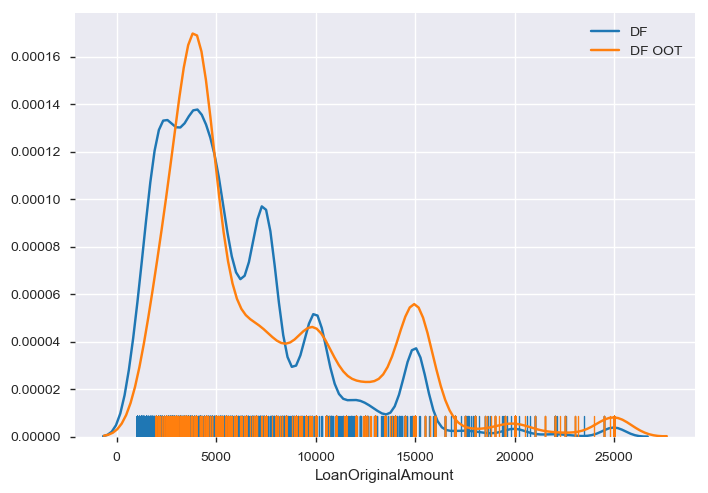

{'Mean': 6030.387907069103,
 'Median': 5000.0,
 'Min': 1000,
 'Max': 25000,
 'p25': 3000.0,
 'p75': 7500.0,
 'Std': 4156.380904245208,
 'NA %': 0.0,
 'Non Zero %': 1.0}

In [49]:
desc_num(df, df_oot, 'LoanOriginalAmount')

We can see through the graph that both in time and oot are stable because the shape of their distributions are very similar.

In [41]:
desc_cat(df, df_oot, 'IncomeRange')

{'Unique Entrys': $25,000-49,999    5420
 $50,000-74,999    4813
 $100,000+         2597
 $75,000-99,999    2554
 $1-24,999         1355
 Not employed       233
 $0                  15
 Name: IncomeRange, dtype: int64, 'NA rate %': 0.0, 'Non Zero %': 1.0}

#### Examples of not so stable features

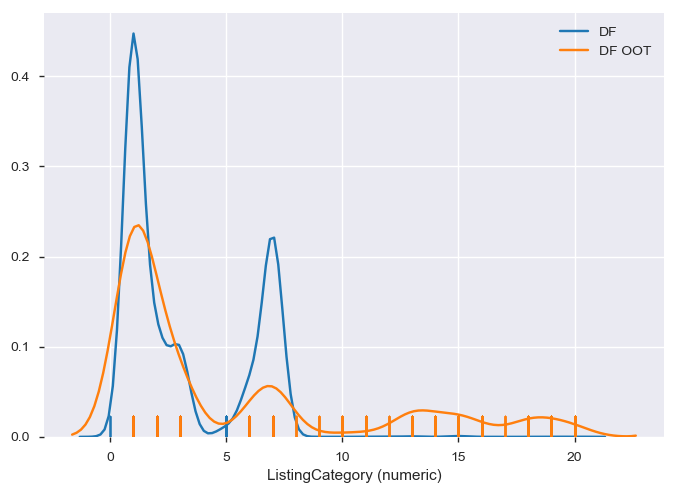

{'Mean': 3.1223193010325656,
 'Median': 2.0,
 'Min': 0,
 'Max': 20,
 'p25': 1.0,
 'p75': 6.0,
 'Std': 2.599796487324916,
 'NA %': 0.0,
 'Non Zero %': 0.9993050039714059}

In [51]:
desc_num(df, df_oot, 'ListingCategory (numeric)')

In [42]:
desc_cat(df, df_oot, 'EmploymentStatus')

{'Unique Entrys': Employed         10647
 Full-time         4329
 Self-employed      915
 Other              538
 Not employed       233
 Retired            175
 Part-time          150
 Name: EmploymentStatus, dtype: int64, 'NA rate %': 0.0, 'Non Zero %': 1.0}

In [43]:
#save the data, as it will come handy in future work
import pickle
#build a dictionary and serialize it
dict_dump = {'features': features,
             'corr_data': corr_relations,
             'iv_df': df_iv,
             'psi_df': df_psi}
pickle.dump(dict_dump, open('./data/output_d2.pkl', 'wb'))

The created feature called **dict_dump** extracts for each feature **IV and PSI** values